![Image](https://www.chevening.org/wp-content/uploads/2019/07/University_of_Bath_logo_svg_.png)

This code constitutes the analysis for the dissertation titled: "Covfefe & NLP – An Investigation into the Impact of Donald Trump’s Tweets on the S&P 500". 

All code is written and compiled by Nathan Thomas from the University of Bath, 2021.


In [1]:
# import the relevant modules

import pandas as pd
import re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Retrieve tweets from excel
tweets = pd.read_csv("C:\\Users\\natha\\OneDrive\\Old Documents\\University\\Uni Work\\Final Year\\Semester 2\\ES30029 - Dissertation\\Data\\Trump Tweets Full Dataset - 8 Jan 2021.csv",
                     usecols=[1,7])

# Change type to string
tweets = tweets.astype(str)

In [2]:
# get date in terms of mdY

"""Changes the format of the datetime to m/d/Y"""
just_date = lambda x: datetime.strftime(x,"%m/%d/%Y")

# set dates column to datetime
tweets.date = pd.to_datetime(tweets.date)

# set dates index
tweets.index = tweets.date

# rename date column
tweets = tweets.rename({"date":"datetime"}, axis=1)

# Get Tweets from 2019-2020 
tweets = tweets.loc["01/01/2019":"02/19/2020"]

## 9418 tweets

## Move tweets not posted during MARKET HOURS (Mon-Fri) to the next trading day

In [3]:
# move to next day if tweet posted after market hours 
day_shift = lambda time: time + timedelta(days = 1 if time.hour>16 else 0)


tweets["datetime"] = tweets["datetime"].apply(day_shift)

## Move tweets posted during WEEKENDS to the next trading day

In [5]:
# move to next trading day if tweet posted on Sat or Sun 
trading_day_shift = lambda time: time + timedelta(days= 7-time.weekday() if 7-time.weekday()<=2 else 0)

tweets["datetime"] = tweets["datetime"].apply(trading_day_shift)

In [7]:
# Clean tweets
convert_datetime = lambda x: x.strftime("%m-%d-%Y")

tweets["datetime"] = tweets["datetime"].apply(convert_datetime)
tweets.datetime = pd.to_datetime(tweets.datetime)

tweets.index = tweets.datetime
tweets.index.name = "date"

In [9]:
tweets.index = tweets.datetime
tweets.index.name = "date"

## Removing public holidays

In [10]:
# Remove Public holidays

holidays_2019 = ["01-01-2019", "01-21-2019","02-18-2019", "04-18-2019",
"04-19-2019", "05-24-2019", "05-27-2019", "07-03-2019",
"07-04-2019", "09-02-2019", "10-14-2019", "11-11-2019",
"11-28-2019", "11-29-2019", "12-24-2019", "12-25-2019"]

holidays_2020 = ["01-01-2020", "01-20-2020", "02-17-2020", "04-10-2020",
"05-25-2020", "07-03-2020", "07-04-2020", "09-07-2020",
"11-11-2020", "11-25-2020", "11-26-2020", "12-25-2020"]

#  Filter out tweets based on these two lists

tweets = tweets[(~tweets.index.isin(holidays_2019)) & (~tweets.index.isin(holidays_2020))]

### 8614 tweets

## Remove links, non-text data

In [11]:
# remove hyperlinks
link_remove = lambda x: re.sub(r"http\S+","",x)

tweets["text"] = tweets["text"].apply(link_remove)

# remove ampersands
amp_remove = lambda x: re.sub(r"&amp","",x)

tweets["text"] = tweets["text"].apply(amp_remove)


# Remove RT
re_remove = lambda x: re.sub(r"RT","",x)

tweets["text"] = tweets["text"].apply(re_remove)
tweets = tweets[tweets.text!=""]


### 8332     tweets

## Get Market Tweets using bag of words



In [ ]:
bag_of_words_econ = [' bear ', ' bull ', 
                 ' currency ', ' dollar ',
                 ' economy ', ' employment ', ' fed ',
                ' growth ', ' income ', 
                ' inflation ', ' interest ', ' jay ',
                ' job ', ' market ', ' money ',
                ' powell ', ' rally ', ' rate ', ' regulation ',
                 ' stimulus ', ' stock ', ' tariff ', 
                ' tax ', ' trade ', ' unemployment ',
               ' Bear ', ' Bull ',
                 ' Currency ', ' Dollar ',
                 ' Economy ', ' Employment ', ' Fed ',
                ' Growth ', ' Income ', 
                ' Inflation ', ' Interest ', ' Jay ',
                ' Job ', ' Market ',
                     ' Money ',
                ' Powell ', ' Rally ', ' Rate ', ' Regulation ',
                ' Stimulus ', ' Stock ', ' Tariff ', 
                 ' Tax ', ' Trade ', ' Unemployment ']

In [13]:
political_bag_of_words = [' bear ', ' bull ', 
                 ' currency ', ' dollar ',
                 ' economy ', ' employment ', ' fed ',
                ' growth ', ' income ', 
                ' inflation ', ' interest ', ' jay ',
                ' job ', ' market ', ' money ',
                ' powell ', ' rally ', ' rate ', ' regulation ',
                 ' stimulus ', ' stock ', ' tariff ', 
                ' tax ', ' trade ', ' unemployment ',
               ' Bear ', ' Bull ',
                 ' Currency ', ' Dollar ',
                 ' Economy ', ' Employment ', ' Fed ',
                ' Growth ', ' Income ', 
                ' Inflation ', ' Interest ', ' Jay ',
                ' Job ', ' Market ',
                     ' Money ',
                ' Powell ', ' Rally ', ' Rate ', ' Regulation ',
                ' Stimulus ', ' Stock ', ' Tariff ', 
                 ' Tax ', ' Trade ', ' Unemployment ', ' Biden ', ' China ', ' Democrat ', ' Impeach ',
                          ' Manipulation ', ' Obama ', ' Poll ', ' Republican ', ' Xi ', ' biden ', ' china ', 
                          ' democrat ', ' impeach ',
                          ' manipulation ', ' obama ', ' poll ', ' republican ', ' xi ']

## Filter tweets based on bag of words

In [ ]:
tweets_econ = tweets[tweets["text"].str.contains("|".join(bag_of_words_econ))]
tweets_econ

In [14]:
tweets_pol = tweets[tweets["text"].str.contains("|".join(political_bag_of_words))]
tweets_pol

,text,datetime
date,,
2019-01-02,Do you think it’s just luck that gas prices ar...,2019-01-02
2019-01-02,Mexico is paying for the Wall through the new ...,2019-01-02
2019-01-03,Important meeting today on Border Security wit...,2019-01-03
2019-01-03,The United States Treasury has taken in MANY b...,2019-01-03
2019-01-04,Michael Pillsbury interviewed by @cvpayne: “Th...,2019-01-04
...,...,...
2020-02-19,.....Mini is illegally buying the Democrat Nom...,2020-02-19
2020-02-19,"@TomFitton: Meanwhile, Obama gang interfered ...",2020-02-19
2020-02-19,"@TomFitton: Over 11 years ago, FBI interviewe...",2020-02-19


## Tokenise & Remove Stopwords

In [15]:
def tokenise(sentence):
    """Removes english stopwords from a string, accounts for lowercase and plurals"""
    stop_words = stopwords.words("english")
    stopwords_dict = Counter(stop_words)
    text_tokenised = word_tokenize(sentence)
    text_without_sw = [word for word in text_tokenised if word.lower() not in stopwords.words()]
    text_without_sw = (" ").join(text_without_sw)
    return text_without_sw

In [ ]:
#  Tokenise econ tweets
tweets_econ["text_tokenised"] = tweets_econ["text"].apply(tokenise)

In [16]:
#  Tokenise political tweets
tweets_pol["text_tokenised"] = tweets_pol["text"].apply(tokenise)

<ipython-input-16-efdb9005fc21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_pol["text_tokenised"] = tweets_pol["text"].apply(tokenise)


### Sentiment Analysis (Vader)

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(string):
    """Uses VADER to retrieve the sentiment polarity of a string"""
    sentiment = analyzer.polarity_scores(string).get("compound")
    return sentiment

In [ ]:
#  Apply sentiment analysis to sample
tweets_econ["Sentiment"] = tweets_econ["text_tokenised"].apply(get_sentiment)

In [18]:
#  Political words 
tweets_pol["Sentiment"] = tweets_pol["text_tokenised"].apply(get_sentiment)

<ipython-input-18-9146ac2bc196>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_pol["Sentiment"] = tweets_pol["text_tokenised"].apply(get_sentiment)


## Checking Robustness of VADER Sentiment on a random sample

In [21]:
# Get data   
tweets_econ_from_excel = pd.read_excel("C:\\Users\\natha\\OneDrive\\Old Documents\\University\\Uni Work\\Final Year\\Semester 2\\ES30029 - Dissertation\\Data\\DISS_DATA.xlsx",
                                       sheet_name = "Confusion Matrix",
                                       usecols=[1,2])

In [ ]:
# Create random sample, n = 100
# tweets_sample_100 = tweets_econ_from_excel.sample(n=100)

tweets_sample_100 = tweets_econ_from_excel

In [25]:
#  Tokenise random sample
tweets_sample_100["tokenised"] = tweets_sample_100["text"].apply(tokenise)

In [27]:
#  Apply sentiment analysis to random sample
tweets_sample_100["Sentiment"] = tweets_sample_100["tokenised"].apply(get_sentiment)

## Creating freq dist chart

In [66]:
def tokenise_freq(sentence):
    """Removes english stopwords from a string, accounts for lowercase and plurals"""
    stop_words = stopwords.words("english")
    stopwords_dict = Counter(stop_words)
    text_tokenised = word_tokenize(sentence)
    text_without_sw = [word for word in text_tokenised if word.lower() not in stopwords.words()]
    return text_without_sw

In [69]:
tweets_econ["text_tokenised_freq"] = tweets_econ["text"].apply(tokenise_freq)

<ipython-input-69-3ea4b73c40d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_econ["text_tokenised_freq"] = tweets_econ["text"].apply(tokenise_freq)


In [262]:
import itertools

freq_all = list(itertools.chain.from_iterable(tweets_econ["text_tokenised_freq"]))

def clean_word(word):
    return re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', '-', word)

freq_all = list(map(clean_word,freq_all))

freq_all = [element for element in freq_all if element not in ['-','--','---','----']]



In [299]:
# get most common 20 words

common_words = list(nltk.FreqDist(freq_all))[0:23]

In [300]:
# get common frequency words frequency
common_words_freq = [freq_all.count(i) for i in common_words]


In [301]:
# Append data to DataFrame

df = pd.DataFrame(index = common_words, data = common_words_freq)

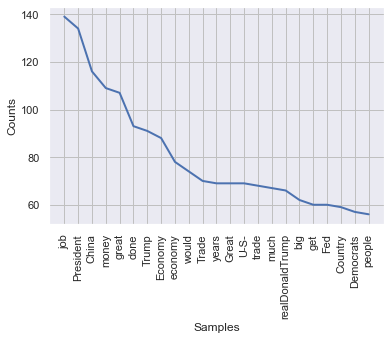

In [302]:
def freqdist(phrase):
    """Apply frequency distribution to the phrase"""
    freqdist = nltk.FreqDist(phrase)
    return freqdist.plot(23)

freqdist(freq_all)